In [1]:
%run ../processing/read_data.py
%run ../processing/functions.ipynb

import numpy as np
import pandas as pd
import os
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn import model_selection

In [2]:
from __future__ import absolute_import, division, print_function
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, ZeroPadding3D
# Helper libraries
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [3]:
path_to_read = '../../data/dl_marcelo_no_treat/'
files = []

for r, d, f in os.walk(path_to_read):
    for file in f:
        if '.png' in file:
            files.append(os.path.join(r, file))
files.sort()
np_files = np.asarray(files)

In [7]:
len(np_files)

85264

In [8]:
conversion = {'IIL_' : 5, 'IIP_' : 7, '_II_' : 4, 'IIn_' : 6, '_Ia_' : 0, '_Ib_' : 1, 'Ibc_' : 2, '_Ic_' : 3}
conversion_bool = {'IIL_' : 0, 'IIP_' : 0, '_II_' : 0, 'IIn_' : 0, '_Ia_' : 1, '_Ib_' : 0, 'Ibc_' : 0, '_Ic_' : 0}


In [9]:
c = [0,0,0,0]
idx = []
i = 0
while i < len(np_files):
    if 'desg' in np_files[i]:
        c[0] = 1
    if 'desi' in np_files[i+1]:
        c[1] = 1
    if 'desr' in np_files[i+2]:
        c[2] = 1
    if 'desz' in np_files[i+3]:
        c[3] = 1
    if c == [1,1,1,1]:
        i = i + 4
        c = [0,0,0,0]
    elif c[1] == 0:
        idx.append(i)
        i = i+1
    elif c[2] == 0:
        idx.append(i)
        idx.append(i+1)
        i = i+2
    elif c[3] == 0:
        idx.append(i)
        idx.append(i+1)  
        idx.append(i+2)
        i = i+3

In [10]:
np_files = np.delete(np_files, idx)
len(np_files)

85264

In [11]:
np_grouped = np_files.reshape(round(np_files.shape[0]/4), 4)
class_id = []
#CHANGE HERE THE INDEX EVERYTIME WE CHANGE THE NAME FROM THE PATH OF THE FOLDER
for g in np_grouped:
    class_id = class_id + [[g[0][-20:-12], g[0][-12:-8]]] 
types = []
types_bool = []
for ids in class_id:
    types = types + [conversion[ids[1]]]
    types_bool = types_bool + [conversion_bool[ids[1]]]
    
astr_objs = []
for i in range(len(np_grouped)):
    astr_objs = astr_objs + [class_id[i]]
    for file in np_grouped[i]:
        img = Image.open(file).convert('L')
        arr = np.array(img)
        astr_objs[-1] = astr_objs[-1] + [arr[5:35,10:56]] 
        #CHANGE HERE IF WE EVENTUALLY CHANGE THE SIZE OF THE IMAGE, OR WANT TO CUT OTHER FRAMES

print( "The quantity of objects is: ", len(astr_objs))

The quantity of objects is:  21316


# K-FOLD

In [9]:
labels = []
images = []
ids = []
for o in astr_objs:
    labels.append((conversion_bool[o[1]])) #converting here to numbers to assure label in training
    desg = o[2]
    desi = o[3]
    desr = o[4]
    desz = o[5]
    gather = np.concatenate((desg,desi,desr,desz),axis = 1)
    images.append(gather)
    ids.append(o[0])
labels = np.asarray(labels)
images = np.asarray(images)
ids = np.asarray(ids)

Xb = images
yb = labels
kfb = KFold(n_splits=19)
Xb_train = []
Xb_test = []
yb_train = []
yb_test = []
id_train = []
id_test = []
for train_index, test_index in kfb.split(Xb):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xb_train.append(Xb[train_index])
    Xb_test.append(Xb[test_index])
    yb_train.append(yb[train_index])
    yb_test.append(yb[test_index])
    id_train.append(ids[train_index])
    id_test.append(ids[test_index])

TRAIN: [ 1122  1123  1124 ... 21313 21314 21315] TEST: [   0    1    2 ... 1119 1120 1121]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [1122 1123 1124 ... 2241 2242 2243]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [2244 2245 2246 ... 3363 3364 3365]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [3366 3367 3368 ... 4485 4486 4487]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [4488 4489 4490 ... 5607 5608 5609]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [5610 5611 5612 ... 6729 6730 6731]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [6732 6733 6734 ... 7851 7852 7853]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [7854 7855 7856 ... 8973 8974 8975]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [ 8976  8977  8978 ... 10095 10096 10097]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [10098 10099 10100 ... 11217 11218 11219]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [11220 11221 11222 ... 

In [10]:
print('The shapes of the objects are:')
print('ids: ', ids.shape)
print('labels: ', labels.shape)
print('images: ', images.shape)
print('train_images: ', Xb_train[0].shape)
print('Other useful object: "test_images"')

The shapes of the objects are:
ids:  (21316,)
labels:  (21316,)
images:  (21316, 30, 184)
train_images:  (20194, 30, 184)
Other useful object: "test_images"


In [11]:
Xb_test[0].shape

(1122, 30, 184)

In [13]:
len(yb_test[0])

1122

# K-FOLD not together

In [12]:
1+1

2

In [13]:
labels = []
images = []
ids = []
for o in astr_objs:
    labels.append((conversion_bool[o[1]])) #converting here to numbers to assure label in training
    images.append(o[2:])
    ids.append(o[0])
labels = np.asarray(labels)
images = np.asarray(images)
ids = np.asarray(ids)

Xb = images
yb = labels
kfb = KFold(n_splits=19)
Xb_train = []
Xb_test = []
yb_train = []
yb_test = []
id_train = []
id_test = []
for train_index, test_index in kfb.split(Xb):
    print("TRAIN:", train_index, "TEST:", test_index)
    Xb_train.append(Xb[train_index])
    Xb_test.append(Xb[test_index])
    yb_train.append(yb[train_index])
    yb_test.append(yb[test_index])
    id_train.append(ids[train_index])
    id_test.append(ids[test_index])


TRAIN: [ 1122  1123  1124 ... 21313 21314 21315] TEST: [   0    1    2 ... 1119 1120 1121]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [1122 1123 1124 ... 2241 2242 2243]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [2244 2245 2246 ... 3363 3364 3365]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [3366 3367 3368 ... 4485 4486 4487]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [4488 4489 4490 ... 5607 5608 5609]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [5610 5611 5612 ... 6729 6730 6731]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [6732 6733 6734 ... 7851 7852 7853]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [7854 7855 7856 ... 8973 8974 8975]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [ 8976  8977  8978 ... 10095 10096 10097]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [10098 10099 10100 ... 11217 11218 11219]
TRAIN: [    0     1     2 ... 21313 21314 21315] TEST: [11220 11221 11222 ... 

In [14]:
#This cell bugs the pc a little
#Normalization and separating the folds to the models
train_images = np.around(Xb_train[0]/255, decimals = 2)
test_images = np.around(Xb_test[0]/255, decimals = 2)
x_train = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
#
#
#train_images1 = np.around(Xb_train[1]/255, decimals = 2)
#test_images1 = np.around(Xb_test[1]/255, decimals = 2)
#x_train1 = train_images1.reshape(train_images1.shape[0], img_rows, img_cols, 1)
#
#
#train_images2 = np.around(Xb_train[2]/255, decimals = 2)
#test_images2 = np.around(Xb_test[2]/255, decimals = 2)
#x_train2 = train_images2.reshape(train_images2.shape[0], img_rows, img_cols, 1)
#
#
#train_images3 = np.around(Xb_train[3]/255, decimals = 2)
#test_images3 = np.around(Xb_test[3]/255, decimals = 2)
#x_train3 = train_images3.reshape(train_images3.shape[0], img_rows, img_cols, 1)
#
#
#train_images4 = np.around(Xb_train[4]/255, decimals = 2)
#test_images4 = np.around(Xb_test[4]/255, decimals = 2)
#x_train4 = train_images4.reshape(train_images4.shape[0], img_rows, img_cols, 1)

In [19]:
img_rows, img_cols = 30, 184
x_train = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

In [21]:
x_train.shape

(1122, 30, 184, 1)

In [26]:
y_train = yb_test[0]

In [27]:
len(y_train)

1122

# Model Convolution NN 2D

In [22]:
np.random.seed(9)
img_rows, img_cols = 30, 184
input_shape = (img_rows,img_cols,1)

model_cv = Sequential()

model_cv.add(Conv2D(64, kernel_size=(4,4), padding='same', activation='relu', input_shape=input_shape))
model_cv.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
model_cv.add(MaxPooling2D(pool_size=(2,2)))
model_cv.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape))
model_cv.add(MaxPooling2D(pool_size=(2,2)))


model_cv.add(Flatten())
model_cv.add(Dense(2, activation=tf.nn.softmax))

model_cv.summary()

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 184, 64)       1088      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 184, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 92, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 92, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 46, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 20608)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 41218     
Total para

In [23]:
np.random.seed(9)
model_cv.compile(optimizer='adam', #optimizer = 'adadelta'
              loss='sparse_categorical_crossentropy', #loss = "binary_crossentropy"
              metrics=['accuracy'])

In [28]:
np.random.seed(9)
model_cv.fit(x_train, y_train, #validation_split = 0.1
             epochs=5)

Epoch 1/10
1122/1122 [==============================] - 46s 41ms/sample - loss: 0.5805 - acc: 0.7380
Epoch 2/10
1122/1122 [==============================] - 46s 41ms/sample - loss: 0.5681 - acc: 0.7487
Epoch 3/10
1122/1122 [==============================] - 43s 38ms/sample - loss: 0.5527 - acc: 0.7478
Epoch 4/10
1122/1122 [==============================] - 43s 38ms/sample - loss: 0.4938 - acc: 0.7656
Epoch 5/10
1122/1122 [==============================] - 44s 40ms/sample - loss: 0.4528 - acc: 0.7709
Epoch 6/10
1122/1122 [==============================] - 44s 39ms/sample - loss: 0.3698 - acc: 0.8102
Epoch 7/10
1122/1122 [==============================] - 43s 38ms/sample - loss: 0.3356 - acc: 0.8387
Epoch 8/10
1122/1122 [==============================] - 45s 40ms/sample - loss: 0.3048 - acc: 0.8627
Epoch 9/10
1122/1122 [==============================] - 44s 39ms/sample - loss: 0.2901 - acc: 0.8761
Epoch 10/10
1122/1122 [==============================] - 52s 46ms/sample - loss: 0.2704 - a

# Evaluation

In [29]:
x_test = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
y_test = yb_train[0]
test_loss_cv, test_acc_cv = model_cv.evaluate(x_test, y_test)

print('Test accuracy model_cv:', test_acc_cv)
print('Test loss model_cv:', test_loss_cv)

20194/20194 [==============================] - 293s 15ms/sample - loss: 0.3587 - acc: 0.8251
Test accuracy model_cv: 0.8251461
Test loss model_cv: 0.35870761272092644


# Confusion Matrices

Normalized confusion matrix
[[0.89849893 0.10150107]
 [0.40978148 0.59021852]]


<IPython.core.display.Javascript object>


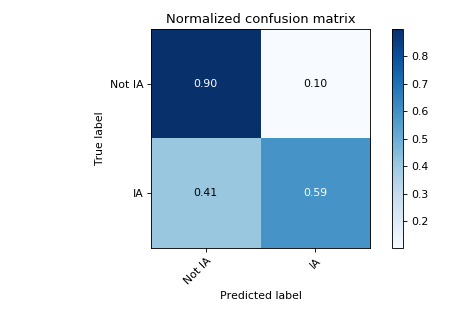

Confusion matrix, without normalization
[[13827  1562]
 [ 1969  2836]]


<IPython.core.display.Javascript object>


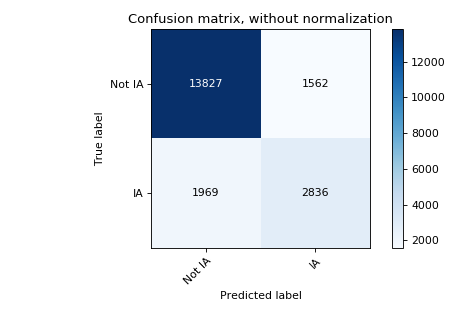

In [30]:
fix_plot_bug()
pred = model_cv.predict(x_test)
pred_bool = transform(pred)
y_true = yb_train[0]
plot_confusion_matrix(y_true, pred_bool, ['Not IA', 'IA'],normalize=True )
plot_confusion_matrix(y_true, pred_bool, ['Not IA', 'IA'],normalize=False )

## invertendo

In [32]:
print(x_train.shape)
x_train_inv = x_train.reshape(len(x_train),184,30,1)
print(x_train_inv.shape)

(1122, 30, 184, 1)
(1122, 184, 30, 1)


In [33]:
np.random.seed(9)
img_rows, img_cols = 30, 184
input_shape_inv = (img_cols,img_rows,1)

model_cv_inv = Sequential()

model_cv_inv.add(Conv2D(64, kernel_size=(4,4), padding='same', activation='relu', input_shape=input_shape_inv))
model_cv_inv.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape_inv))
model_cv_inv.add(MaxPooling2D(pool_size=(2,2)))
model_cv_inv.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape_inv))
model_cv_inv.add(MaxPooling2D(pool_size=(2,2)))


model_cv_inv.add(Flatten())
model_cv_inv.add(Dense(2, activation=tf.nn.softmax))

model_cv_inv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 184, 30, 64)       1088      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 184, 30, 64)       36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 92, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 92, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 7, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20608)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 41218     
Total para

In [34]:
np.random.seed(9)
model_cv_inv.compile(optimizer='adam', #optimizer = 'adadelta'
              loss='sparse_categorical_crossentropy', #loss = "binary_crossentropy"
              metrics=['accuracy'])

In [36]:
np.random.seed(9)
model_cv_inv.fit(x_train_inv, y_train, #validation_split = 0.1
             epochs=5)

Epoch 1/5
1122/1122 [==============================] - 48s 43ms/sample - loss: 0.5805 - acc: 0.7487
Epoch 2/5
1122/1122 [==============================] - 47s 42ms/sample - loss: 0.5699 - acc: 0.7487
Epoch 3/5
1122/1122 [==============================] - 50s 45ms/sample - loss: 0.5781 - acc: 0.7487
Epoch 4/5
1122/1122 [==============================] - 51s 45ms/sample - loss: 0.5699 - acc: 0.7487
Epoch 5/5
1122/1122 [==============================] - 51s 46ms/sample - loss: 0.5708 - acc: 0.7487


In [37]:
x_test_inv = train_images.reshape(train_images.shape[0], img_cols, img_rows, 1)
test_loss_cv_inv, test_acc_cv_inv = model_cv_inv.evaluate(x_test_inv, y_test)

print('Test accuracy model_cv:', test_acc_cv_inv)
print('Test loss model_cv:', test_loss_cv_inv)

20194/20194 [==============================] - 315s 16ms/sample - loss: 0.5438 - acc: 0.7621
Test accuracy model_cv: 0.762058
Test loss model_cv: 0.5437790484219196


In [45]:
x_test_inv.shape

(20194, 184, 30, 1)

Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


<IPython.core.display.Javascript object>


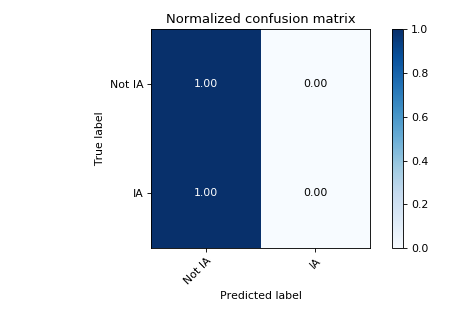

Confusion matrix, without normalization
[[15389     0]
 [ 4805     0]]


<IPython.core.display.Javascript object>


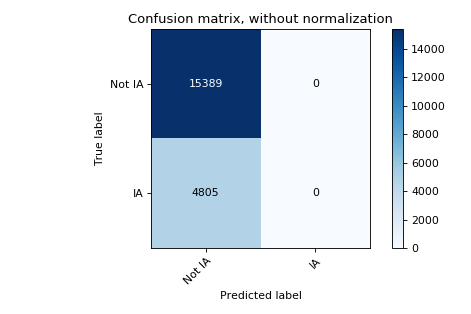

In [42]:
fix_plot_bug()
pred_inv = model_cv_inv.predict(x_test_inv)
pred_bool_inv = transform(pred_inv)
y_true = yb_train[0]
plot_confusion_matrix(y_true, pred_bool_inv, ['Not IA', 'IA'],normalize=True )
plot_confusion_matrix(y_true, pred_bool_inv, ['Not IA', 'IA'],normalize=False )

In [ ]:
x_test = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
y_test = yb_train[0]
test_loss_cv, test_acc_cv = model_cv.evaluate(x_test, y_test)

print('Test accuracy model_cv:', test_acc_cv)
print('Test loss model_cv:', test_loss_cv)

In [ ]:
fix_plot_bug()
pred = model_cv.predict(x_test)
pred_bool = transform(pred)
y_true = yb_train[0]
plot_confusion_matrix(y_true, pred_bool, ['Not IA', 'IA'],normalize=True )
plot_confusion_matrix(y_true, pred_bool, ['Not IA', 'IA'],normalize=False )